### Testing Evo

#### Imports

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import math
import torch_geometric
from torch_geometric.nn import GCNConv
import IPython
from IPython.display import display, HTML, Image

from graphUtils import add_edges
from generator import generate_organism
from cell import Cell
from organism import Organism
from GNCAmodel import GNCA
from visualizer import Visualizer
from evo_trainer import Evo_Trainer

#%run Visualizer.py # --allows for reloading the particular code

#### Train the network

In [2]:
n = 10
popsize = 20
generations = 1000
name = 'centered5'
#device = torch.device('mps:0')
device = torch.device('cpu')
trainer = Evo_Trainer(n, device, popsize)

2023-02-14 15:01:43,323	INFO worker.py:1528 -- Started a local Ray instance.


[2023-02-14 15:01:45] INFO     <13867> evotorch.core: Instance of `Custom_NEProblem` (id:4368772128) -- The `dtype` for the problem's decision variables is set as torch.float32
[2023-02-14 15:01:45] INFO     <13867> evotorch.core: Instance of `Custom_NEProblem` (id:4368772128) -- `eval_dtype` (the dtype of the fitnesses and evaluation data) is set as torch.float32
[2023-02-14 15:01:45] INFO     <13867> evotorch.core: Instance of `Custom_NEProblem` (id:4368772128) -- The `device` of the problem is set as cpu
[2023-02-14 15:01:45] INFO     <13867> evotorch.core: Instance of `Custom_NEProblem` (id:4368772128) -- The number of actors that will be allocated for parallelized evaluation is 10
[2023-02-14 15:01:45] INFO     <13867> evotorch.core: Instance of `Custom_NEProblem` (id:4368772128) -- Number of GPUs that will be allocated per actor is None


/Users/martinholst/miniconda3/envs/AML/lib/python3.10/site-packages/evotorch/tools/misc.py:1107: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  result = torch.tensor(data, **kwargs)


In [3]:
trainer.train(generations, name)

         iter : 1
     stepsize : ReadOnlyTensor(0.0972)
    mean_eval : -1391.564208984375
pop_best_eval : -238.92115783691406
  median_eval : -1479.6917724609375

         iter : 2
     stepsize : ReadOnlyTensor(0.0951)
    mean_eval : -1116.873046875
pop_best_eval : -171.44876098632812
  median_eval : -1410.3466796875

         iter : 3
     stepsize : ReadOnlyTensor(0.0933)
    mean_eval : -657.8875732421875
pop_best_eval : -1.0790811777114868
  median_eval : -250.263427734375

         iter : 4
     stepsize : ReadOnlyTensor(0.0918)
    mean_eval : -719.7000122070312
pop_best_eval : -71.23558807373047
  median_eval : -1085.0042724609375

         iter : 5
     stepsize : ReadOnlyTensor(0.0905)
    mean_eval : -342.3099060058594
pop_best_eval : 2.97029709815979
  median_eval : -159.67886352539062

         iter : 6
     stepsize : ReadOnlyTensor(0.0894)
    mean_eval : -117.6400146484375
pop_best_eval : 2.97029709815979
  median_eval : -68.08523559570312

         iter : 7
     ste

In [ ]:
network = trainer.get_trained_network()

In [ ]:
#network = trainer.problem.parameterize_net(trainer.searcher.status['best'])

#### Visualize trained network

In [ ]:
organism = generate_organism(n, device)
graph = organism.toGraph()
visualizer = Visualizer()
network(graph, 0)

(Data(x=[40, 5], edge_index=[1, 0], device=cpu, attr=[1]),
 tensor([0., 0.]),
 0.0,
 0.0,
 0.0)

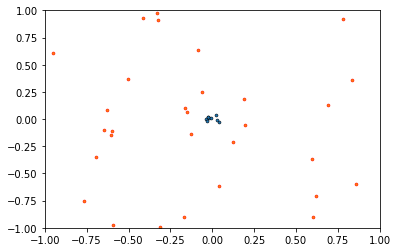

In [ ]:
anim = visualizer.animate_organism(graph, network, food=30, frames=300)
visualizer.save_animation_to_gif(anim, name, 10)

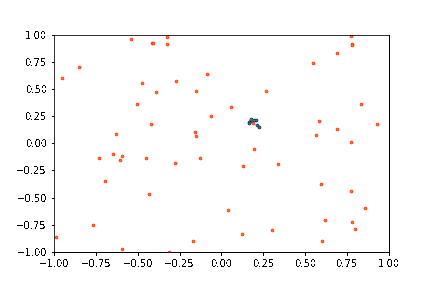

In [ ]:
Image('../animation/' + name + '.gif')

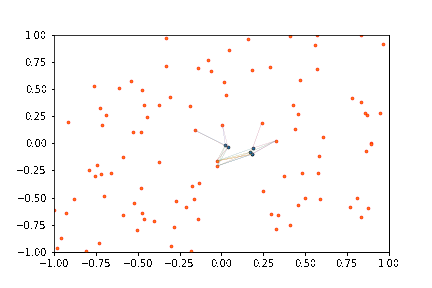

In [ ]:
Image('../animation/GATConv1.gif')

In [ ]:
anim.frame_seq = anim.new_saved_frame_seq() 
IPython.display.HTML(anim.to_jshtml())

In [ ]:
print(network)

CGConv1(
  (conv_layers): CGConv(5, dim=4)
  (mlp): Sequential(
    (0): Linear(in_features=5, out_features=5, bias=True)
    (1): ReLU()
    (2): Linear(in_features=5, out_features=2, bias=True)
    (3): ReLU()
  )
)


In [ ]:
print(network.conv_layers)
for param in network.conv_layers.parameters():
  print(param.data)

CGConv(5, dim=4)
tensor([[ 0.8300,  1.2566, -1.5743,  0.8671, -0.5736, -0.5426, -0.1563,  0.0135,
          0.4715,  0.1904, -0.4787, -1.1222,  0.1499, -0.0652],
        [ 0.1995,  0.1026,  1.1222,  0.4715, -1.0696, -0.2206,  0.1069, -0.2666,
         -0.2801, -0.7738,  1.6358, -0.8107,  0.3893,  0.1582],
        [ 1.2649, -1.4220,  2.2258, -1.6411, -1.5385,  0.2531,  1.5989,  0.9264,
          0.8439, -0.0461, -1.2736,  0.3217,  0.3932,  0.1397],
        [-0.2641,  0.4542,  0.7231,  0.0206, -0.4018,  0.1331, -1.0496,  0.3262,
         -0.0920, -0.2668,  1.3613,  0.5924, -0.1335, -0.3101],
        [-0.0759,  0.2861,  0.5312,  0.1540, -0.1472,  1.2357,  1.1265,  0.9747,
         -0.1904,  0.0879, -0.0231,  1.0748,  0.0457,  0.8637]])
tensor([ 0.8005, -0.0920, -0.7634,  0.3235, -0.2344])
tensor([[ 0.0244,  0.4963,  0.9542, -1.8030, -0.2849, -1.4957,  0.0816, -0.0429,
         -0.3410, -0.5833,  0.9617, -0.1418, -0.9349,  0.7099],
        [ 0.0798,  0.9769, -0.9756, -1.1590,  1.4358,  1.3

In [ ]:
%%javascript
IPython.notebook.save_notebook()

<IPython.core.display.Javascript object>